# Scaling and Normalization
Many algorithms will perform better with a normalized or scaled dataset. It might be no significant difference with LinearRegression model, but other models that use gradiendt descent need normalization to help the algorithms converge to a local optima.<br>
2 most common scaling and normalization skills in sklearn are minmax and StandardScaler.

In [1]:
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset:  brain_categorical.csv

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to
to the Size of the Head", Biometrika, Vol. 4, pp105-123

Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.

Variables/Columns
GENDER: Gender  Male or Female
AGE: Age Range  20-46 or 46+
SIZE: Head size (cm^3)  21-24
WEIGHT: Brain weight (grams)  29-32

In [2]:
# Read the csv file
brain = pd.read_csv("Resources/brain_categorical.csv")
brain.head()

,gender,age,size,weight
0,Male,20-46,4512,1530
1,Male,20-46,3738,1297
2,Male,20-46,4261,1335
3,Male,20-46,3777,1282
4,Male,20-46,4177,1590


In [3]:
X = brain[["gender", "age", "size"]]
y = brain[["weight"]].values.reshape(-1,1)

print(X.shape, y.shape)

(237, 3) (237, 1)


In [4]:
# ues train_test_split
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# StandardScaler, we use it when we don't know everything about the data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [6]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

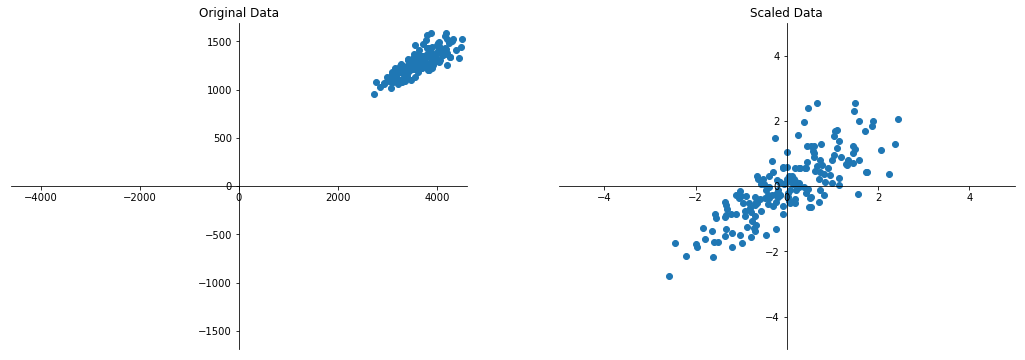

In [7]:
# StandardScaler applies a Guassian distribution to our data 
# where the mean is 0 and the standard deviation is 1
# Let's see the difference between 2 plots
fig1 = plt.figure(figsize=(18,6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["size"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx - 100, maxx + 100)
axes1.set_ylim(-maxy - 100, maxy + 100)

axes2.set_xlim(-5, 5)
axes2.set_ylim(-5, 5)

def set_axes(ax):
    ax.spines["left"].set_position("center")
    ax.spines["right"].set_color("none")
    ax.spines["bottom"].set_position("center")
    ax.spines["top"].set_color("none")
    ax.xaxis.set_ticks_position("bottom")
    ax.yaxis.set_ticks_position("left")
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["size"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])